# Index

#### Introduction
#### Data dictionary
#### Objectives
#### Code
    + First look to the data
    + Pre-processing
        - Context errors  
        - Non-context errors
        - Conclusion pre-processing
    + EDA
        -1º Amount and Age
        -2º Investigation with boxplots.
        -3º Scatter Plots
#### Final conclusions

**__________________________________________________________________________________________**
**___________________________________________________________________________________________**

# Introduction

We work for a company Blackwell Electronics, a successful electronics retailer for over three decades.  
Our boss Danielle Sherman, told us that over a year ago they launched an eCommerce website. And they  
want to leverage this data to inform our decisions about site-related activities, in order to  
continue to maximize the amount of revenue we generate from eCommerce sales.  

For this task we have been given a csv file with customers data.  
Using it we have to perform some basic initial manipulations: Pre-processing and EDA.  

We are asked to look for specific patters like:  
* Do customers in different regions spend more per transaction?  
* Which regions spend the most/least?  
* Is there a relationship between number of items purchased and amount spent?  



The e-mail we recieved is the following:

    Blackwell has been a successful electronics retailer for over three decades, with over numerous  
    stores in various locations. A little over a year ago we launched our eCommerce website.  
    We are starting to build up customer transaction data from the site and we want to leverage  
    this data to inform our decisions about site-related activities, like online marketing,  
    enhancements to the site and so on, in order to continue to maximize the amount of revenue  
    we generate from eCommerce sales.

    To that end, I would like you to explore the customer transaction data we have collected from  
    recent online and in-store sales and see if you can infer any insights about customer purchasing    
    behavior. Specifically, I am interested in the following:  

    Do customers in different regions spend more per transaction?  
    Which regions spend the most/least?  
    Is there a relationship between number of items purchased and amount spent?  

    To investigate this, I’d like you to use data mining methods to explore the data, look for  
    patterns in the data and draw conclusions. I have attached a data file of customer transactions;  
    it includes some information about the customer who made the transaction, as well as the amount of  
    the transaction, and how many items were purchased. Once you have completed your analysis, please  
    create a brief report of your findings and conclusions and an explanation of how you arrived at  
    those conclusions so I can discuss them with Martin.



# Data dictionary

The data from our dataset has 5 variables, one in each column.  
Some are numerical but other categories with a number assigned to it.

**In-store**  
    0: Online  
    1: In the store  

**Age**  
    Numerical value of the age of the person who made the purchase (integer).  
    
**Items**  
    Numerical value of the number of items purchased by a person. (integer)  
    
**Amount**  
    Numerical value of the price paid in a purchase. (float)  
    
**Region**  
    Categorical reference to the region in which the purchase was made.  
    
    1: North
    2: South 
    3: East 
    4: West 
    

# Objectives

The general objective is to look at the data trough different methods to discover hidden patters or variable correlations, as well as understand de shopping habits for this sample of the population. 

Specificly, we have been asked for *"using data mining methods to explore the customer transaction*  
*data collected from recent online and in-store sales to infer any insights and conclusions about*  
*customer purchasing behavior"*

And the objectives which are asked are:
* Do customers in different regions spend more per transaction?  
* Which regions spend the most/least?  
* Is there a relationship between number of items purchased and amount spent?  


# The code starts here:

In [1]:
#import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import plotly.express as px

In [2]:
#import the data
data=pd.read_csv("Demographic_Data.csv")

## first look on the data


In [3]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
#metadata
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


We have a dataset made of 5 variables with 80000 entries each one.

As we will see in a second, this data actually contains some  
errors must be fixed, so the information above might be wrong.

# PRE-PROCESSING 
### Search for non-context errors in the data
Errors which do not need to take into account the spedific context of the data.

Like numerical errors (nan, null), missing values or duplicates.

In [6]:
#check for duplicates
duplicates = data.duplicated()
print(data[duplicates==True])
print("Number of duplicated cols: ",data[duplicates.to_numpy()].shape[0])


       in-store  age  items   amount  region
17858         0   76      6   283.61       2
26112         0   67      4   320.41       2
29343         1   23      2  1019.50       4
33834         1   38      3  1993.80       1
34214         1   31      5  1488.10       4
34706         0   39      5  1268.00       4
35971         0   38      7   391.51       2
43958         1   22      1  1303.20       4
44308         1   26      5  1495.70       4
45164         0   79      6   342.28       2
47414         0   27      6  1555.10       4
51600         0   56      2  1941.70       4
52013         1   50      5  1889.40       1
53652         0   29      2   144.43       2
58454         0   76      1   259.44       2
59539         1   49      2  1162.00       4
59859         0   30      7  2535.10       4
61439         1   32      4  1106.10       4
63970         1   42      5  1731.10       4
75506         0   44      2  1756.70       4
78688         1   40      2  1080.60       1
Number of 

I see some columns with duplicated values, there's no prior reason for NOT dropping it.

In [7]:
data=data.drop_duplicates()

In [8]:
#Also we check for nan or null values
print(data.isna().sum())
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64
in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [9]:
#and see that all columns are homogeneous repesct to types
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

#### Conclusion
It were 21 duplicated rows, we drop it.  
No nan or null values where founded, there is no need to do anything about it.  
All values are numerical but some of them represent categorical data, this is the case of "in-store" and "region".



### Context errors  
Another thing to take care of, are the values and types of the data in its context.   
Is it the kind of value and type we want for that variable?  
With this purpose, we will look through the unique values in each column and see if  
the is some data missing or misstyped or the values are not as expected.

From in-store, we have only values 0 and 1.

From age, a range between 15 and 100 moreless, integer values.

Items, not negative values, integer values.

Amount, not negative values, float values. The amount of decimal places.

Region, integer values 1,2,3,4

Because for In-store, age, items and region it is well discretized,  
instead of a histogram, I will plot the number of times it appeared each unique value. In this way,  
we will ensure that there is no missing data. 

In [10]:
colname=data.columns.values


Unique values for in-store : [0, 1]
Unique values for age : [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85]
Unique values for items : [1, 2, 3, 4, 5, 6, 7, 8]
Unique values for region : [1, 2, 3, 4]


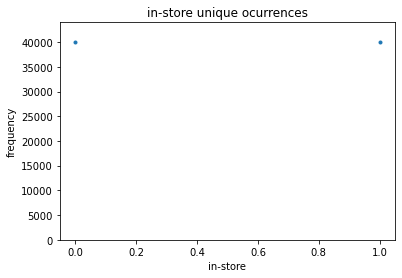

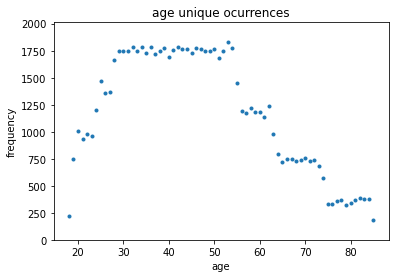

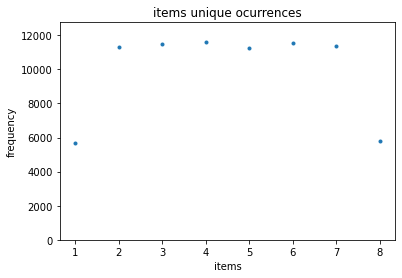

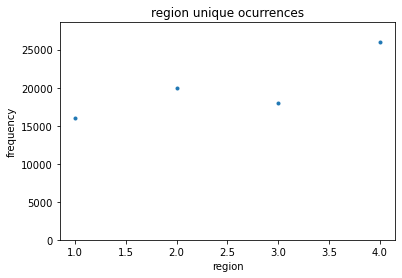

In [11]:
#loop over the columns for ploting the unique values.
for i in colname:
    uniq=data[i].unique()
    
    #we include this "if" statement because if some variable like "amount",
    #is float, then we will have a lot of slightly different values, there the use of 
    #histograms is much better.
    if uniq.shape[0]<20000:
        ocurrences=[]
        for j in uniq:
            ocurrences.append(data[i].loc[data[i]==j].shape[0])
        plt.figure()
        plt.plot(uniq,ocurrences,".")
        plt.ylim([0,1.1*max(ocurrences)])
        plt.title(f"{i} unique ocurrences")
        print(f"Unique values for {i} :",sorted(uniq))
        plt.xlabel(f"{i}")
        plt.ylabel("frequency")

values between 5.0047 3000.0


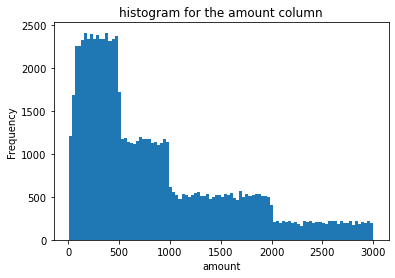

In [12]:
#the amount has float values, and unique is not the best option, better use a histogram.
data["amount"].plot.hist(bins=100)
plt.xlabel("amount")
plt.title("histogram for the amount column")
print("values between",data["amount"].min(),data["amount"].max())

#here we won't sort them, since unique values there's a lot.

All the values satisfied the prior context-requeriments we established,  
based on the information we have (we dont have information about number  
of shops, their location etc.). All the unique values we have in each column are values we  
expected, given the context we have.

We have confirmed as well, that there are no missing values.

Also, it is important to search for outliers, values that are unusualy far from the many others.
First we won't distinguish the data between regions or items, becuause we are looking for outliers in the data as a whole. Later more specific cases will be discused.

Text(0.5, 1.0, 'Boxplot for amount values')

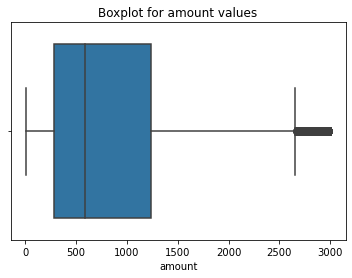

In [13]:
sns.boxplot(x="amount",data=data)
plt.title("Boxplot for amount values")

Text(0.5, 1.0, 'Boxplot for age values')

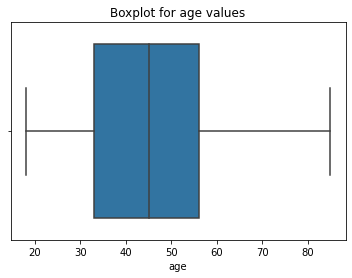

In [14]:
sns.boxplot(x="age",data=data)
plt.title("Boxplot for age values")

The outliers must be understood in its context. With some variables it can indicate some type of error.  
In others cases it just means a data distribution that leads to few values far from the others, but it is  
not an error. This is probably or case, where some purchases where more expensive than the normal ones.  
I won't take acctions against those outliers.

Now we can do general statistics with the DataFrame, being more confident about the results.

In [15]:
print(data.describe(),"\n __________________")
print(data.info())

           in-store           age         items        amount        region
count  79979.000000  79979.000000  79979.000000  79979.000000  79979.000000
mean       0.500006     45.758512      4.505133    835.825727      2.674915
std        0.500003     15.715158      2.061250    721.263650      1.126642
min        0.000000     18.000000      1.000000      5.004700      1.000000
25%        0.000000     33.000000      3.000000    285.120000      2.000000
50%        1.000000     45.000000      4.000000    582.140000      3.000000
75%        1.000000     56.000000      6.000000   1233.400000      4.000000
max        1.000000     85.000000      8.000000   3000.000000      4.000000 
 __________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  

Or dataset is made of 79979 entries for 5 variables.

### Conclusions pre-processing

At first sight, with the analysis I have done, the data  
only had the duplicated rows issue.

The data seems balance in many variables, but later on when ML algorithms are applied,  
we should pay special attention to it.


This first analysis showed interesting results and patterns.  
All this can give us a path to follow for the EDA section.

* 0 AND 1 "in-store" values are almost the same.
* Number of items 1 and 8 are smaller while 2,3,4,5,6,7 are almost the same.
* Age and Amount histogram distributions could be interesting for further analysis.



# EDA 

This task requires 3 main milestones:

* Do customers in different regions spend more per transaction? 

* Which regions spend the most/least?

* Is there a relationship between the number of items purchased and amount spent?

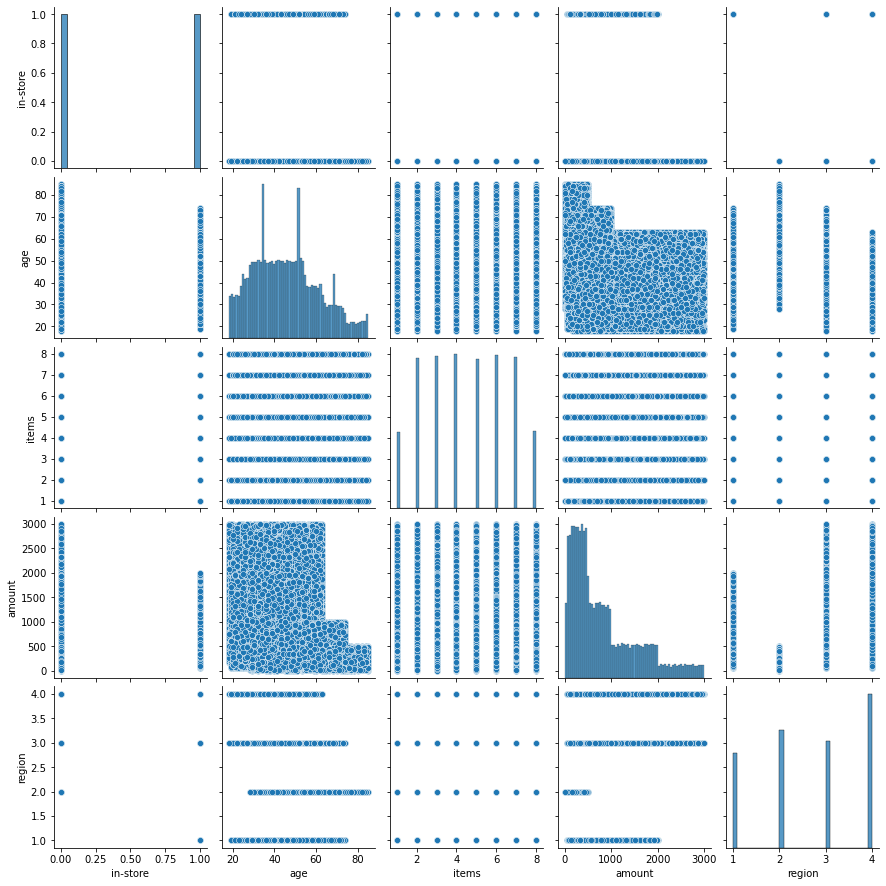

In [16]:
#to check relations between variables in a very initial stage,  
#the pair plot from seaborn is a very easy option.
sns.pairplot(data);


From here it is possible to insight some trends in the data.

The diagonal histograms are what we did in last section.   
(Notice how the histogram for the age frequencies show two large bars,  
we can dismiss it since it is due to the chosen discretization, in the  
plot where is shown the frequency for each unique values, theres no such peaks.)

## +Is visible that:

### -interesting
* In region 2 there is no "in-store" purchase
* In region 1 there is no online purchase
* The max age is larger for online purchase.
* The amount per region is clearly unequal.
* The amount whether online or in-store is unequal as well.
* There is some relation between the age and the amount.
* No matter the items sold, the amount can reach al values.
* In each region buys almost same ages, with an exception.- (very old people buys, ¿are those online?)


### -prob. not that interesting
* In store and online all different quantities of items are sold.
* All quantity of items are sold on every region.



## +About the milestones:
* The amount per transaction totally changes from one region to another.

* From this pairplot we cant tell any realtion between number of items purchased and the amount spent.


## Line of attack

1.- Explore the distributions for the amount spent and ages.

2.- Explore with boxplots for further information.

3.- Explore with scatter plots the relation between 2 and 3 variables.
    And maybe search for correlations.


In [17]:
colname

array(['in-store', 'age', 'items', 'amount', 'region'], dtype=object)

## 1º amount and age

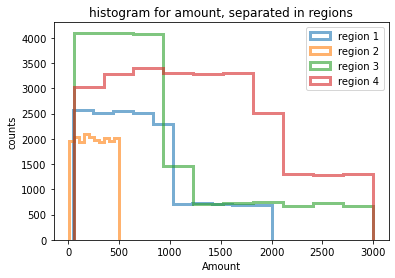

In [18]:
#Now lets plot histograms for the amount in different regions
#Lets investigate the relation between amount and region
#for this I'll hist all amounts, which has been grouped by region
x=[]
for i in [1,2,3,4]:
    aux_data=data.loc[data["region"]==i,"amount"].to_numpy()
    x.append(aux_data)
    plt.hist(aux_data,alpha=0.6,histtype="step",linewidth=3,label=f"region {i}")
    plt.xlabel("Amount")
    plt.ylabel("counts")
    plt.title("histogram for amount, separated in regions")
    plt.legend()

To see what percentage does each region contribute to the incomes, we use a PIECHART.  
First we have to count the total amount of ocurrences in some intervals.    
Those intervals are where the big jumps are.

In [19]:
#this code is for counting the income in different regions
#the intervals are approx:
intervals=[[0,500],[500,1000],[1000,2000],[2000,3000]]
results=[]
labels=[]
#this for loop runs though the intervals
for i in range(4):
    #this complicated lines, looks for rows with only values in the selected interval, then
    #sums the values grouping them by regions, and returns the amount column.
    aux=data.loc[(data["amount"]>intervals[i][0])&(data["amount"]<intervals[i][1]),:]
    aux=aux.groupby("region").sum()["amount"]
    #this for loop is needes because if no occurrences are found in one region, then pandas
    #dont say that amount=0, simply dismisses it.
    for i in [1,2,3,4]:
        if i not in aux.index.values:
            aux=aux.append(pd.Series([0],index=[i]))
    labels.append(aux.index.values)
    aux=aux.to_numpy()
    results.append(aux)
results=np.asarray(results)
labels=np.asarray(labels)

#finally we sort them by the labels to have coherent colors in the charts, becuase right now  
#those are [1,3,4,2],[3,4,2,1]...,and the red will be represent different regions in diff charts.
results=np.array([results[i,np.argsort(labels)[i]] for i in range(4)])
labels.sort(axis=-1)


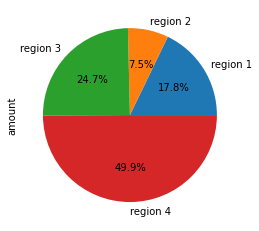

In [20]:
#this chart is for the total company
data.groupby("region").sum()["amount"].plot.pie(autopct='%1.1f%%',
                                                labels=["region 1","region 2",
                                                        "region 3","region 4"]);

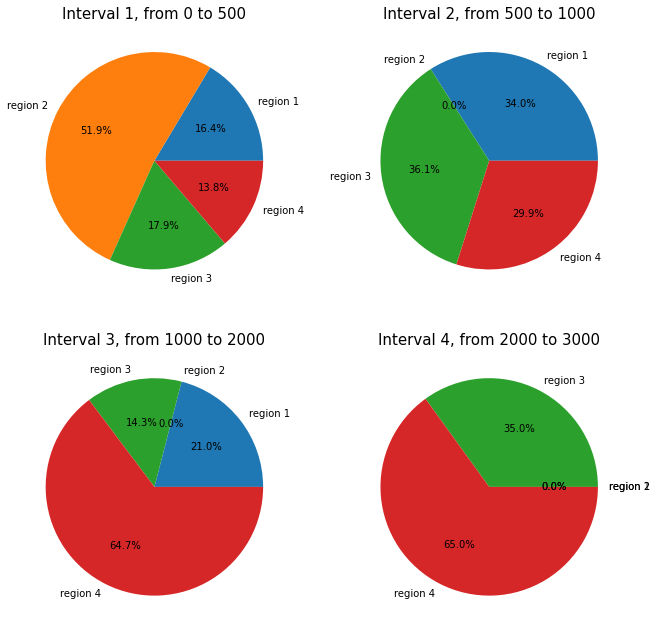

In [21]:
#one interval of amounts, separated by regions
plt.figure(figsize=(11,11))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(f"Interval {i+1}, from {intervals[i][0]} to {intervals[i][1]}",fontsize=15)
    plt.pie(results[i], labels=[f"region {labels[i][0]}",f"region {labels[i][1]}",
                                f"region {labels[i][2]}",f"region {labels[i][3]}"],autopct='%1.1f%%');

There are 4 very defined intervals for the amount values ([0,500],[500,1000],[1000,2000],[2000,3000]),  
and the regions that contribute more on those intervals are shown in the pie charts.  
For the first interval it clear how region 1 is more than half of the income,  
but it contributes nothing on the other amount intervals.  
Region 4 is present in all intervals we have considered.  

From region 4 comes more than half of the income in the high amount values.  
To see this with a better perspective (not with percentages, which can lead to a false perception),  
the stacked histogram is very useful since it shows real absolute quantities, and not relative ones  
(like percentages).

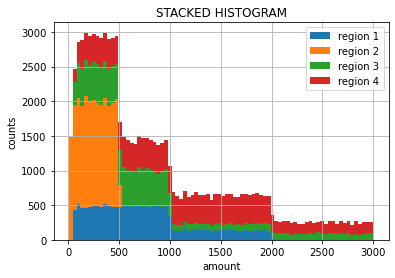

In [22]:
#A stacked histogram show very well the contributions to the shape of the histogram
plt.grid()
plt.title("STACKED HISTOGRAM")
a=plt.hist(x, 80, histtype='bar', stacked=True,
           label=["region 1","region 2","region 3","region 4"])
plt.legend()
plt.xlabel("amount");
plt.ylabel("counts");

#plt.hist(data["amount"],80, histtype='bar')


It's clear from last STACKED histogram, and piecharts, that the incomes from different regions are unequal.  
And if we observe the boxplot for this quantities:

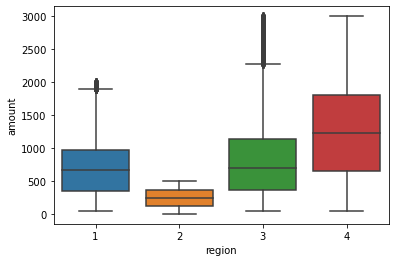

In [23]:
sns.boxplot(x=colname[4],y=colname[3], data=data);


From last boxplot is clear how:
* The amounts in region 2 are low and very located.
* Region 3 has lots of outliers because a great difference between amounts (lots smaller and some larger).
* Region 1 has outliers as well.
* Region 4 has more distributed values, al amounts are, moreless, equally present with some variations.

(As we mentioned earlier, we will allow outliers here, since it depends on the nature of the  
variable we are considering.)

Even being more than half of the contribution for the income in the first interval ([0,500]), from  
this boxplot and the piechart, it is clear how in the overall, the region 2 makes the smallest contribution.

It is like a store which sell TONS of chewing gum, there's no moment they are not selling them.  
And next to it, other store sells very expensive wine. The range of prices are very very different,  
and the sales frequencies are different as well (the wine is less frequently sold). Nonetheless,  
after all, the owner of the wine store earns much more money.



It is very interesting the structure of blocks present in the amounts histogram.  
To explore it more in depth, lets see how does "in-store" and "online" contribute to the  
histograms for the amount in each region.

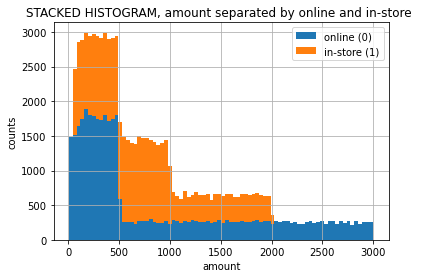

In [24]:
#total amount in all regions separated by online and in-store
plt.grid()
plt.title("STACKED HISTOGRAM, amount separated by online and in-store ")
a=plt.hist([data.loc[data["in-store"]==0,"amount"].to_numpy(),
            data.loc[data["in-store"]==1,"amount"].to_numpy()],
           80, histtype='bar', stacked=True,label=["online (0)","in-store (1)"])
plt.legend()
plt.ylabel("counts");

plt.xlabel("amount");

This stacked histograms shows very well where does the jump in ~500 comes from.  
In is clear as well, that the online amount is very stable along values >500.

In [25]:
#first I get the data to plot the histograms for a region and separated by channel.
x_0=[]
x_1=[]
for i in [1,2,3,4]:
    aux_data0=data.loc[(data["region"]==i) & (data["in-store"]==0),"amount"].to_numpy()
    aux_data1=data.loc[(data["region"]==i) & (data["in-store"]==1),"amount"].to_numpy()
    x_0.append(aux_data0)
    x_1.append(aux_data1)


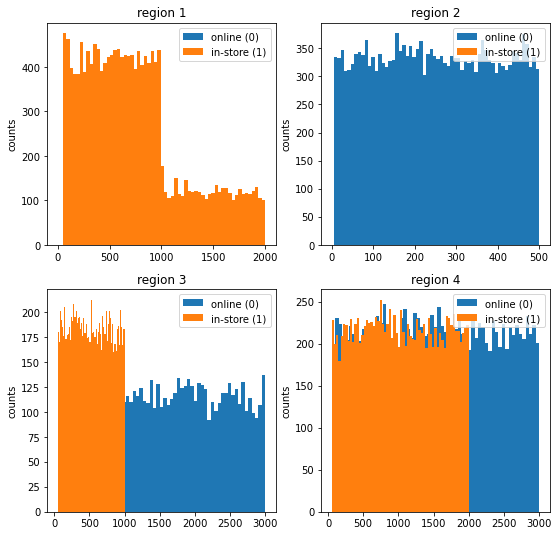

In [26]:
#lets plot it 
plt.figure(figsize=(9,9))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(f"region {i+1}")
    plt.hist(x_0[i],bins=60, label="online (0)")
    plt.hist(x_1[i],bins=60,label="in-store (1)")
    plt.ylabel("counts")
    plt.legend()

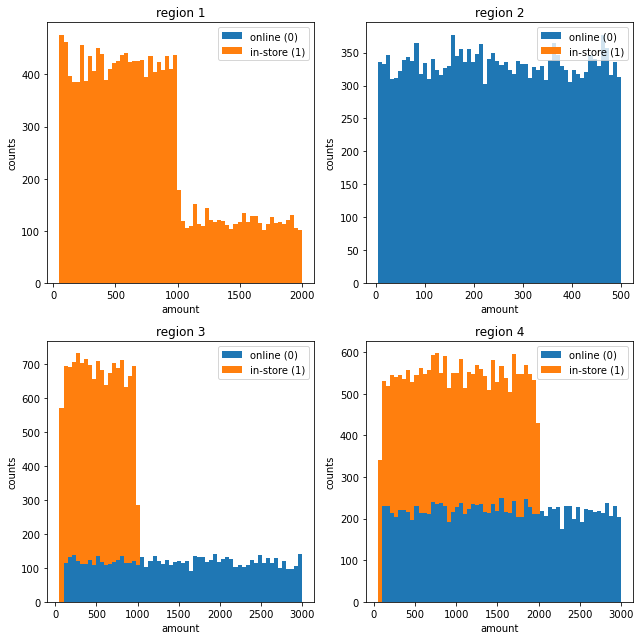

In [27]:
#now with stacked histograms
plt.figure(figsize=(9,9))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(f"region {i+1}")
    plt.hist([x_0[i],x_1[i]],bins=60,stacked=True,label=["online (0)","in-store (1)"])
    plt.xlabel("amount")
    plt.ylabel("counts")
    plt.legend()
    plt.tight_layout()

This plots give us a very good explanation about why those jumps in regions 3 and 4.  
They are the results of online + in-store, each one without any strange jump  
We can't really tell why in store the purchases are lower in price. We can make guesses  
but it really depends on many variables we dont know:
* Maybe big articles are more expensive, and the people wants the shop to deliver them.
* Maybe online there is more stock, and it is very exclusive.

However, in region 1, all was bought in-store, and we still have that strange jump.  
As we have said, it is far beyond our knowledge of the problem.


To the question: **Do customers in different regions spend more per transaction?**  
The asnwer is yes. Given this sample of data, refering to the population,  
Region 4 spends most of the amount in this company, and region 2 least on this company.

Now lets investigate the ages.  
The histogram for the ages in different regions shows:

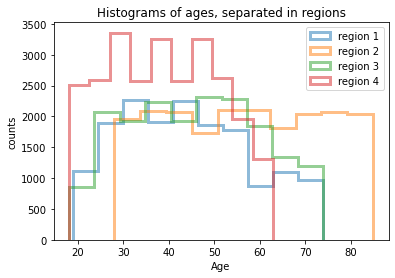

In [28]:
#separated histograms for regions
x=[]
for i in [1,2,3,4]:
    aux_data=data.loc[data["region"]==i,"age"].to_numpy()
    #the ages for specific regions is saved for later.
    x.append(aux_data)
    plt.hist(aux_data,alpha=0.5,histtype="step",linewidth=3,label=f"region {i}")
    plt.xlabel("Age")
    plt.ylabel("counts")
    plt.title("Histograms of ages, separated in regions")
    plt.legend()

And if we stack them:

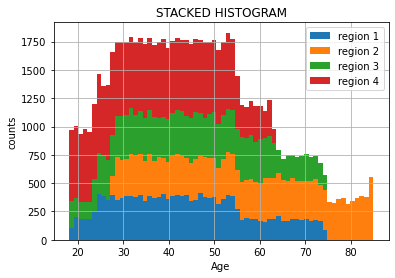

In [29]:
#stack histogram of ages, the colors are the regions from where they come
plt.grid()
plt.title("STACKED HISTOGRAM")
a=plt.hist(x,np.amax(data.age.values)-np.amin(data.age.values)-1,histtype='bar', 
           stacked=True,label=["region 1","region 2","region 3","region 4"])
plt.legend()
plt.ylabel("counts")
plt.xlabel("Age");

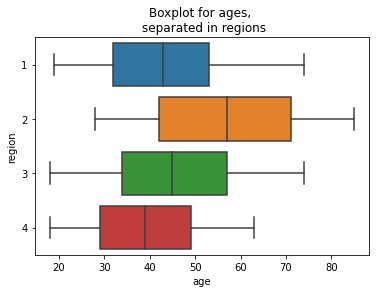

In [30]:
#in a box plot its very clear how the ages aredistributed
sns.boxplot(x=colname[1],y=colname[4], data=data,orient="h")
plt.title("Boxplot for ages, \n separated in regions");


From box plot it is pretty clear that region 2 has older customers.

I could be useful to know which regions are more important given a ranges of ages.  
This could be very important in marketing for example.

In [31]:
#this code is for counting the ages in the different regions
#the intervals are approx:
intervals=[[18,30],[30,60],[60,100]]
results=[]
labels=[]
#this for loop runs though the intervals
for i in range(3):
    #this complicated lines, looks for rows with only values in the selected interval, then
    #sums the values grouping them by regions, and returns the amount column.
    aux=data.loc[(data["age"]>intervals[i][0])&(data["age"]<intervals[i][1]),:]
    aux=aux.groupby("region").sum()["age"]
    #this for loop is needes because if no occurrences are found in one region, then pandas
    #dont say that amount=0, simply dismisses it.
    for i in [1,2,3,4]:
        if i not in aux.index.values:
            aux=aux.append(pd.Series([0],index=[i]))
    labels.append(aux.index.values)
    aux=aux.to_numpy()
    results.append(aux)
results=np.asarray(results)
labels=np.asarray(labels)

#finally we sort them by the labels to have coherent colors in the charts, becuase right now  
#those are [1,3,4,2],[3,4,2,1]..., and the red will be represent different regions in diff charts.
results=np.array([results[i,np.argsort(labels)[i]] for i in range(3)])
labels.sort(axis=-1)


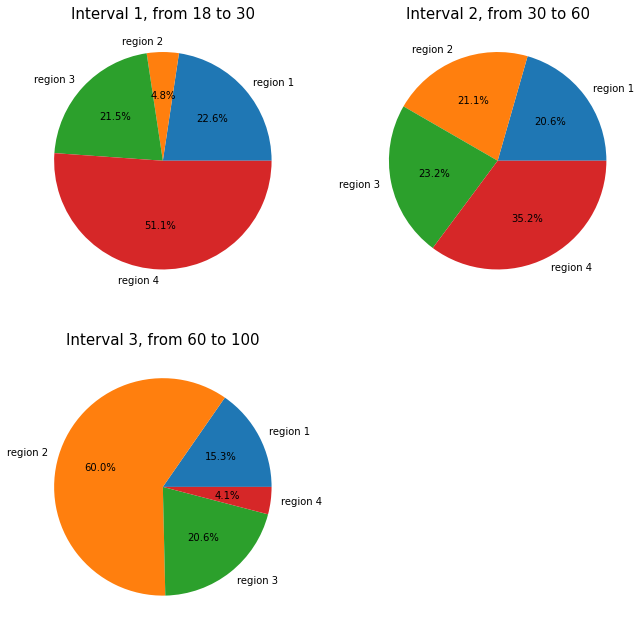

In [32]:
#given an inerval of ages, separation by regions
plt.figure(figsize=(11,11))
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.title(f"Interval {i+1}, from {intervals[i][0]} to {intervals[i][1]}",fontsize=15)
    plt.pie(results[i], labels=[f"region {labels[i][0]}",f"region {labels[i][1]}",
                                f"region {labels[i][2]}",f"region {labels[i][3]}"],autopct='%1.1f%%');

Contribution of each region to the age range of consumers.

In [33]:
# given a region, the amount of people in some interval of ages.
lista_ages=[]
for i in range(3):
    aux=data.loc[(data["age"]>intervals[i][0])&(data["age"]<intervals[i][1]),:]
    aux=aux.groupby("region").count()["age"].to_numpy()
    lista_ages.append(aux)
lista_ages=np.asarray(lista_ages)

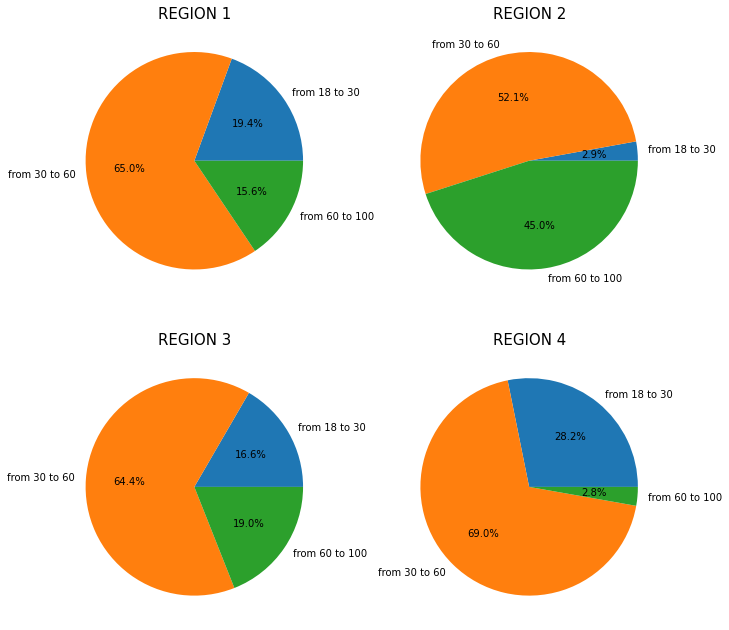

In [34]:
#separated by ages
plt.figure(figsize=(11,11))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(f"REGION {i+1}",fontsize=15)
    plt.pie(lista_ages[:,i], labels=[f"from {intervals[0][0]} to {intervals[0][1]}",
                                f"from {intervals[1][0]} to {intervals[1][1]}",
                                f"from {intervals[2][0]} to {intervals[2][1]}"],autopct='%1.1f%%');

Composition in ages of each region.

From last two groups of piechars, theres a lot of interesnting results, such as:  

* Old people (60-100) buys a lot (60%) in region 2
* The most common collective is 30-60.
* In Region 1 is where more young customers are (~22%).
* Region 4 has very few old customers.

So far, we have studied the age and amount mostly.  
Now with boxplots lets see more about items and others.

# 2º Investigation with boxplots

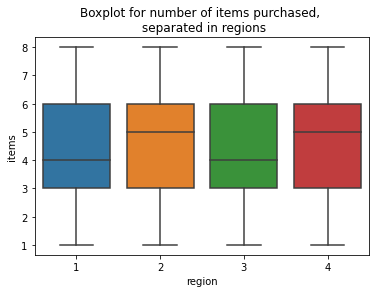

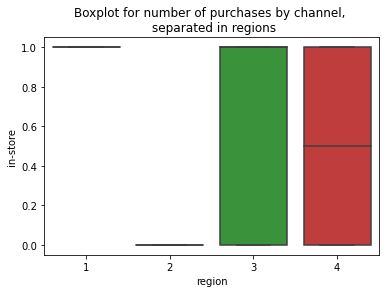

In [35]:
#to have a better view for the distributions some boxplots are used
plt.figure()
sns.boxplot(x=colname[4],y=colname[2], data=data)
plt.title("Boxplot for number of items purchased, \n separated in regions")

plt.figure()
sns.boxplot(x=colname[4],y=colname[0], data=data)
plt.title("Boxplot for number of purchases by channel, \n separated in regions");


The number of items purchased are almost the same in all regions.

And the online and in-store purchases at region 1 and 2 are as we saw before.  
In region 3 and 4 can be better a pie chart for vialization.

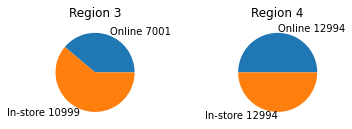

In [36]:
#simple piechart for comparing online and in-store shopping for different regions.
for i in [3,4]:
    aux=data.loc[data["region"]==i,:].groupby("in-store").count()["region"].to_numpy()
    plt.subplot(2,2,i)
    plt.title(f"Region {i}")
    plt.pie(aux,labels=[f"Online {aux[0]}",f"In-store {aux[1]}"])

Region 1 only in-store, region 2 only online, region 3 slightly more in-store and region 4 has  
the same number of purchases online and in-store. Remember that the number of purchases in-store  
and online for the whole company was almost same ~40000.

We keep representing boxplots, now with respect to in-store variable. 

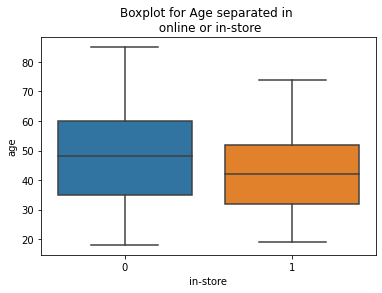

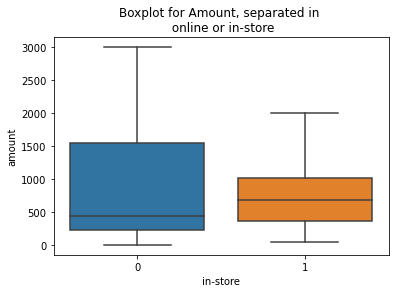

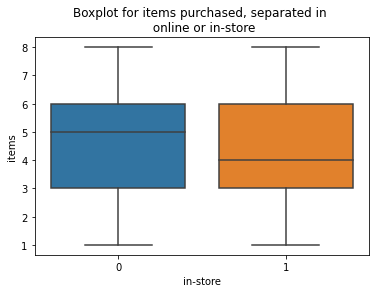

In [37]:
plt.figure()
sns.boxplot(x=colname[0],y=colname[1], data=data)
plt.title("Boxplot for Age separated in \n online or in-store")

plt.figure()
sns.boxplot(x=colname[0],y=colname[3], data=data)
plt.title("Boxplot for Amount, separated in \n online or in-store")

plt.figure()
sns.boxplot(x=colname[0],y=colname[2], data=data)
plt.title("Boxplot for items purchased, separated in \n online or in-store");



From here we can get more conclusions:
* Online and in store the number of items es ~the same (4 and 5 from average).
* The average purchase online has a smaller amount than in shop, but online we can see higher amount purchases.
* The average person that buys online, is older than the one that does it in-store.

Now boxplots with respect to the number of items.

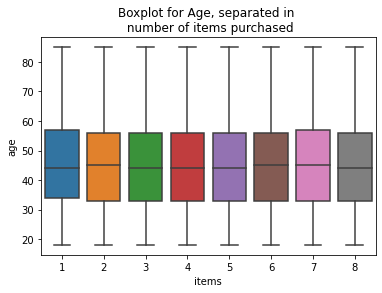

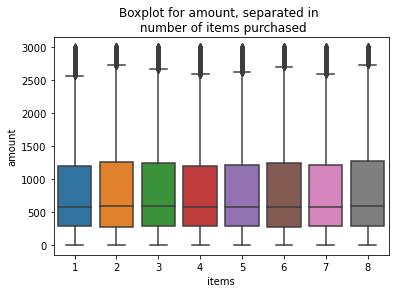

In [38]:

plt.figure()
sns.boxplot(x=colname[2],y=colname[1], data=data)
plt.title("Boxplot for Age, separated in \n number of items purchased")
plt.figure()
sns.boxplot(x=colname[2],y=colname[3], data=data)
plt.title("Boxplot for amount, separated in \n number of items purchased");


From last boxplots, we can see how all amounts of items are bought by all range of ages.  
The average age for all items is also the same. And this average age it's the average age for the whole population.  
~45 years. We expected that, because the frequency for the number of items was almos the same (a bit smaller for 1 and 8).

In [39]:
data.age.mean()

45.75851160929744

Regarding the number of items, and the amount that the customer has spend, all number of items  
have all range of values for the amount. There is outliers but we consider in this varaible (amount),  
they are normal.

One milestone was to determine whether was a relation between amount and items or not. Lets explore a bit more  
there variables to have a conclusion.

In [40]:
#preparation of the data
list_per_item=[]

#two loops, one for the number of items, other for the regions
for i in range(1,9):
    list_per_regions=[]
    for j in range(1,5):
        list_per_regions.append(data.loc[(data["items"]==i)& (data["region"]==j),"amount"].to_numpy())
    list_per_item.append(list_per_regions)

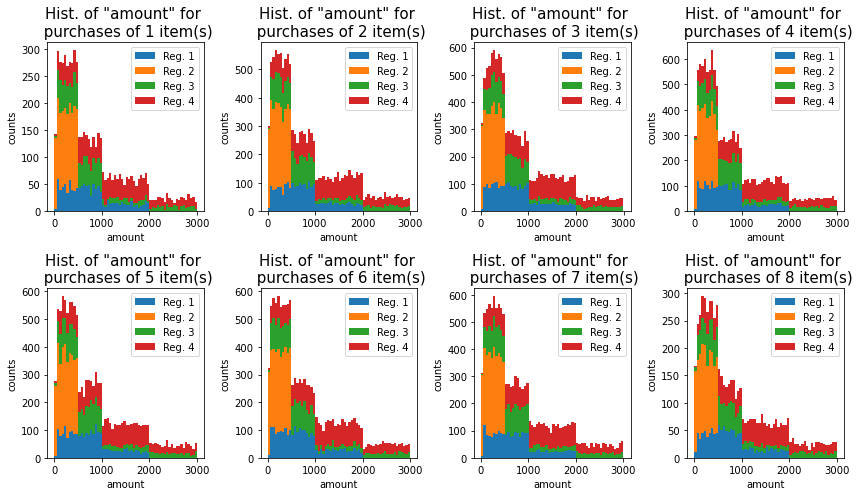

In [41]:
#stacked plot for the different items, region and amounts
plt.figure(figsize=(12,7))
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.hist(list_per_item[i-1],stacked=True,bins=60,label=["Reg. 1","Reg. 2","Reg. 3","Reg. 4"])
    plt.xlabel("amount")
    plt.title(f"Hist. of \"amount\" for \n purchases of {i} item(s)",fontsize=15)
    plt.tight_layout()
    plt.ylabel("counts")
    plt.legend()

Again we are limited by the information we have, but it is a bit strange that, when buying only one item,  
the amount paid is as frequent as buying 8 items. And 1 and 8 are almost half as frequent.  
The colors allows us to confirm that the contributions of each region, has the same shape, and it does not  
happen for example that in region 4 its very very usual to but 6 items between 1000- 2000.  
It is not more common than buying 3,4,5... items.


I haven't found any relation between number of items and amount. 

An example for explaining this situation could be: Imagine you have access to the amount  
I have spent on my credit card, and I ask you to tell me how many articles I bought.  
There is no way base on our data to give an accurate answer, or even propabilistically likely.

# 3º Scatter plots

We will use this mostly for detecting correlations and clusters.

We should mention that a correlation must be between two numerical values, and if one is categorical but  
represented by a number like in our case "in-store", "region". Therefore a correlation has no sense, since  
we have chosen the values as a convention.  
Here I am particularly interested in relations between amount and age.

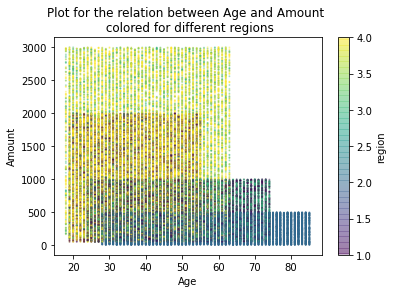

In [42]:
plt.scatter(data["age"],data["amount"],c=data["region"].to_numpy(),s=1,alpha=0.3,vmin=1,vmax=4)
plt.xlabel("Age")
plt.ylabel("Amount")
plt.colorbar(label="region")
plt.title("Plot for the relation between Age and Amount \n colored for different regions");

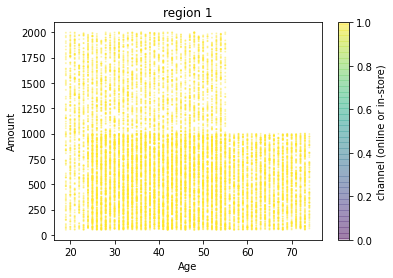

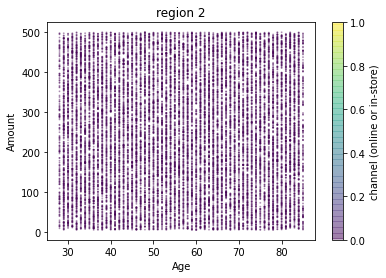

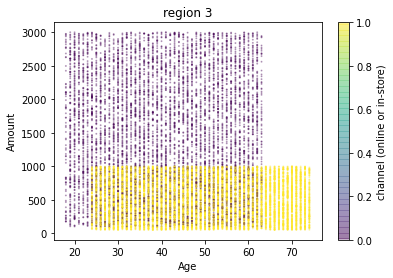

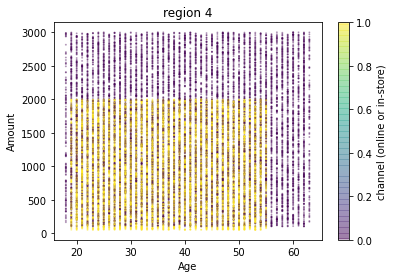

In [43]:
#loop over regions for ploting the points age-amount colored by "in-store"
for i in range(1,5):
    x=data.loc[data["region"]==i,"age"]
    y=data.loc[data["region"]==i,"amount"]
    #x=data["age"]
    #y=data["amount"]region
    plt.figure()
    plt.title(f"region {i}")
    plt.scatter(x,y,c=data.loc[data["region"]==i,"in-store"].to_numpy(),s=1,alpha=0.3,vmin=0,vmax=1)
    plt.xlabel("Age")
    plt.ylabel("Amount")
    plt.colorbar(label="channel (online or in-store)")

The data is very well delimited in rectangles when plotted age-amount.

From this scatter plot we can see almost the same than with the histograms about regions, amounts and in-store. 

For Region 1, where al the purchases were made in-store, we can see something we couldn that easy from the     histogram.  
There is two well defined squares, and both have different limits, therefore when they overlap, we see that  
jump from the histograms. For this there are many feasible explanations, like: 

* The online data was entered as in-store.
* Two distinct services offered by the same company.
But it has a shape extremely similar to the scatter for region 3.

The other scatter plots I tried, showed no extra information about the data. 

Also, no regression coefs. has been computed, since there is no evidences in the variables we have considered.

# Final conclusions
Throughout this report there is a lot of useful information about trends and important patterns,  
however we sould focus and be precise on what has been asked. The questions were:

* Do customers in different regions spend more per transaction? 

        We have a limitated data about the data in 4 regions, but, we can say that based on our data,
        the region twp has spent less money on this company than the citizens in any of 
        the other regions. Regions are clearly different:  amount, age...

* Which regions spend the most/least?
    
        The region which gave the best income for the company as a whole, is Region 4 (west).
        And the region that gave least mone is region 2 (south).

* Is there a relationship between the number of items purchased and amount spent?

        Relative to it, we have not found any relevant evidence for this statement, 
        all items are equally possible for any amount. (Except for 1 and 8 items which are a bit slower,)

And to complete the conclusions, we will list some major insights we have made, 
and some suggestions for the boss:

* Region 1 (North) only buys in-store, while region 2 only does it online.
* In region 2 (south), buys onler people than young.
* The most common age range is 30-60 in all regions.
* There is no age-items or amount-items dependence.
* There is an amount-region relation. If the purchase was higher than 500, it was not made in region 2 (south), <br> and if was higher than 2000, it was not done in region 2 (south) or region 1 (north).

* It will be very helpful the addition of time as a variable.
* Probably it will be needed some more information about the demographic and store locations for understanding somethings.

**(Many many more relations and conclusions are commented along the report, but i wanted <br> to keep the final conclusions simple, for further information, read carefully all the comments that come along with the figures.)**